# 분모통일
* subvideo를 쓴 구간별 정확도 비교
1. subvideo의 값이 null이 아닌 framenum 탐색
2. crop된 interpolate df에서 framenum 탐색
3. 두개의 값을 비교하기 norm2 정규화
4. 아이디별 누적합
5. 그래프별 표현

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


origin_set ="220514_Final_Result.csv"
subcam_set="5-14_offtime_test.csv" #frame num :6000 ~12000
interpolate_set ="Result-0514-Fin.csv"

In [2]:
df_origin = pd.read_csv(origin_set, low_memory=False)
df_interpolate = pd.read_csv(interpolate_set)
df_subcam = pd.read_csv(subcam_set)
df_subcam.frameNum+=6000 # 6000번대부터 시작하도록 offset 값 더하기

In [3]:
def remove_comma(x):
    # ,가 있으면 제거하고 , 앞의값만 남김
    if str(x).find(",") != -1:
        #,로 앞뒤를 자르고 그중 앞의 덩어리를 넣어주세요, 이때 dtype은 int
        return int(str(x).split(",")[0])
    #아니면 값 유지
    return x

for i in df_origin.columns:
    df_origin[i] = df_origin[i].apply(remove_comma)

for i in df_subcam.columns:
    df_subcam[i] = df_subcam[i].apply(remove_comma)

In [4]:
#framenum size 맞추기

df_crop = df_origin[6000:11999][:].copy()
df_crop

,frameNum,1_X,1_Y,2_X,2_Y,3_X,3_Y,4_X,4_Y,5_X,...,12_X,12_Y,13_X,13_Y,14_X,14_Y,15_X,15_Y,16_X,16_Y
6000,6001,NaN,NaN,1119,271,1277,555,551,521,1356,...,1115,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6001,6002,NaN,NaN,1119,271,1278,553,546,526,1355,...,1122,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6002,6003,NaN,NaN,1119,270,1284,540,542,529,1355,...,1130,487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6003,6004,NaN,NaN,1119,271,1285,542,543,530,1354,...,1139,495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6004,6005,NaN,NaN,1119,271,1287,541,551,528,1354,...,1144,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,11995,838,173,1006,289,1535,597,828,224,1338,...,1419,621,NaN,NaN,773,274,NaN,NaN,NaN,NaN
11995,11996,836,173,1005,285,1535,597,824,224,1338,...,1419,620,NaN,NaN,770,275,NaN,NaN,NaN,NaN
11996,11997,833,173,984,286,1535,597,827,224,1338,...,1419,619,NaN,NaN,773,274,NaN,NaN,NaN,NaN
11997,11998,837,173,1015,269,1535,596,830,223,1338,...,1419,618,NaN,NaN,774,274,NaN,NaN,NaN,NaN


In [5]:
df_crop=df_crop.reset_index()
df_crop=df_crop.drop("index", axis=1)
df_crop #subcam을 빈칸에 넣기전 전처리 완료하여 framenum을 맞춘 상태

,frameNum,1_X,1_Y,2_X,2_Y,3_X,3_Y,4_X,4_Y,5_X,...,12_X,12_Y,13_X,13_Y,14_X,14_Y,15_X,15_Y,16_X,16_Y
0,6001,NaN,NaN,1119,271,1277,555,551,521,1356,...,1115,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6002,NaN,NaN,1119,271,1278,553,546,526,1355,...,1122,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6003,NaN,NaN,1119,270,1284,540,542,529,1355,...,1130,487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6004,NaN,NaN,1119,271,1285,542,543,530,1354,...,1139,495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6005,NaN,NaN,1119,271,1287,541,551,528,1354,...,1144,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,11995,838,173,1006,289,1535,597,828,224,1338,...,1419,621,NaN,NaN,773,274,NaN,NaN,NaN,NaN
5995,11996,836,173,1005,285,1535,597,824,224,1338,...,1419,620,NaN,NaN,770,275,NaN,NaN,NaN,NaN
5996,11997,833,173,984,286,1535,597,827,224,1338,...,1419,619,NaN,NaN,773,274,NaN,NaN,NaN,NaN
5997,11998,837,173,1015,269,1535,596,830,223,1338,...,1419,618,NaN,NaN,774,274,NaN,NaN,NaN,NaN


In [6]:
for i in df_crop.columns:
    for idx in range(5999):
        if(pd.isna(df_crop[i][idx])==True):
            #df_crop[i][idx]= df_subcam[i][idx]
            #print(df_crop[i][idx] ," <= ",df_subcam[i][idx])
            df_crop[i][idx]=df_subcam[i][idx]
        else :
            df_crop[i][idx] = np.nan
            
df_crop # origin의 빈칸에, subcam의 값이 존재한다면, subcam의 값으로 채운 것

C:\Users\82108\AppData\Local\Temp/ipykernel_2316/2960635847.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crop[i][idx] = np.nan
C:\Users\82108\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\82108\AppData\Local\Temp/ipykernel_2316/2960635847.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crop[i][idx]=df_sub

,frameNum,1_X,1_Y,2_X,2_Y,3_X,3_Y,4_X,4_Y,5_X,...,12_X,12_Y,13_X,13_Y,14_X,14_Y,15_X,15_Y,16_X,16_Y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,833.0,223.0,NaN,NaN,NaN,NaN,NaN,NaN
5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,814.0,202.0,NaN,NaN,NaN,NaN,NaN,NaN
5997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,795.0,179.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_crop= df_crop.astype("float64")
df_crop_des=df_crop.describe()
df_crop_count_num =df_crop_des.iloc[0] # 각 컬럼별로 존재하는 값의 개수 세기

In [8]:
df_crop_des

,frameNum,1_X,1_Y,2_X,2_Y,3_X,3_Y,4_X,4_Y,5_X,...,12_X,12_Y,13_X,13_Y,14_X,14_Y,15_X,15_Y,16_X,16_Y
count,0.0,89.000000,89.000000,317.000000,317.000000,5.000000,5.000000,714.000000,714.000000,7.0,...,0.0,0.0,1000.000000,1000.00000,557.000000,557.000000,0.0,0.0,0.0,0.0
mean,NaN,1360.584270,530.123596,1097.012618,366.148265,1357.200000,567.400000,668.725490,754.487395,1287.0,...,NaN,NaN,702.054000,210.54400,858.147217,816.432675,NaN,NaN,NaN,NaN
std,NaN,155.389892,55.529030,8.116234,12.355754,93.716061,67.429964,31.145638,34.341948,6.0,...,NaN,NaN,39.611035,11.91537,84.927412,238.018071,NaN,NaN,NaN,NaN
min,NaN,889.000000,373.000000,1083.000000,342.000000,1216.000000,530.000000,568.000000,240.000000,1279.0,...,NaN,NaN,675.000000,179.00000,576.000000,300.000000,NaN,NaN,NaN,NaN
25%,NaN,1406.000000,532.000000,1091.000000,357.000000,1305.000000,530.000000,652.000000,751.000000,1281.5,...,NaN,NaN,686.000000,202.00000,845.000000,643.000000,NaN,NaN,NaN,NaN
50%,NaN,1413.000000,543.000000,1096.000000,367.000000,1421.000000,532.000000,662.000000,757.000000,1291.0,...,NaN,NaN,691.000000,211.00000,884.000000,963.000000,NaN,NaN,NaN,NaN
75%,NaN,1420.000000,546.000000,1102.000000,376.000000,1422.000000,559.000000,677.000000,764.000000,1292.0,...,NaN,NaN,695.000000,219.00000,912.000000,997.000000,NaN,NaN,NaN,NaN
max,NaN,1447.000000,629.000000,1122.000000,398.000000,1422.000000,686.000000,792.000000,899.000000,1292.0,...,NaN,NaN,856.000000,269.00000,976.000000,1008.000000,NaN,NaN,NaN,NaN


In [9]:
df_inter_crop = df_interpolate[6000:11999][:].copy()
df_inter_crop=df_inter_crop.reset_index()
df_inter_crop=df_inter_crop.drop("Unnamed: 0", axis=1)
df_inter_crop=df_inter_crop.drop("index", axis=1)
df_inter_crop

,frameNum,1_X,1_Y,2_X,2_Y,3_X,3_Y,4_X,4_Y,5_X,...,12_X,12_Y,13_X,13_Y,14_X,14_Y,15_X,15_Y,16_X,16_Y
0,6001,1492.483087,519.873749,1119.0,271.0,1277.0,555.0,551.0,521.0,1356.0,...,1115.0,472.0,889.600028,184.151534,1254.964495,662.545180,NaN,NaN,NaN,NaN
1,6002,1493.208924,517.348078,1119.0,271.0,1278.0,553.0,546.0,526.0,1355.0,...,1122.0,480.0,889.596909,184.142157,1254.841580,662.638509,NaN,NaN,NaN,NaN
2,6003,1493.934761,514.822406,1119.0,270.0,1284.0,540.0,542.0,529.0,1355.0,...,1130.0,487.0,889.593791,184.132780,1254.718664,662.731837,NaN,NaN,NaN,NaN
3,6004,1494.660598,512.296734,1119.0,271.0,1285.0,542.0,543.0,530.0,1354.0,...,1139.0,495.0,889.590673,184.123403,1254.595748,662.825166,NaN,NaN,NaN,NaN
4,6005,1495.386435,509.771063,1119.0,271.0,1287.0,541.0,551.0,528.0,1354.0,...,1144.0,500.0,889.587554,184.114027,1254.472832,662.918495,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,11995,838.000000,173.000000,1006.0,289.0,1535.0,597.0,828.0,224.0,1338.0,...,1419.0,621.0,831.860946,160.209028,773.000000,274.000000,NaN,NaN,NaN,NaN
5995,11996,836.000000,173.000000,1005.0,285.0,1535.0,597.0,824.0,224.0,1338.0,...,1419.0,620.0,832.187907,160.121876,770.000000,275.000000,NaN,NaN,NaN,NaN
5996,11997,833.000000,173.000000,984.0,286.0,1535.0,597.0,827.0,224.0,1338.0,...,1419.0,619.0,832.514867,160.034725,773.000000,274.000000,NaN,NaN,NaN,NaN
5997,11998,837.000000,173.000000,1015.0,269.0,1535.0,596.0,830.0,223.0,1338.0,...,1419.0,618.0,832.841828,159.947573,774.000000,274.000000,NaN,NaN,NaN,NaN


In [10]:
df_inter_add_null=pd.DataFrame()

for i in df_inter_crop.columns:
    for idx in range(5999):
        if(pd.isna(df_crop[i][idx])==True):
            df_inter_crop[i][idx] = np.nan
        else :
            df_inter_crop[i][idx] = df_inter_crop[i][idx]

C:\Users\82108\AppData\Local\Temp/ipykernel_2316/2356894832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inter_crop[i][idx] = np.nan
C:\Users\82108\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
df_inter_crop.describe() #interpolate 된 테이블에다가 subcam 값 존재 하는 비율만큼 존재하도록 만들기

,frameNum,1_X,1_Y,2_X,2_Y,3_X,3_Y,4_X,4_Y,5_X,...,12_X,12_Y,13_X,13_Y,14_X,14_Y,15_X,15_Y,16_X,16_Y
count,0.0,89.000000,89.000000,317.000000,317.000000,5.000000,5.000000,714.000000,714.000000,7.000000,...,0.0,0.0,1000.000000,1000.000000,557.000000,557.000000,0.0,0.0,0.0,0.0
mean,NaN,1417.853195,466.829369,1096.020942,277.470401,1447.429823,620.884353,685.554124,594.147559,1332.068682,...,NaN,NaN,881.947154,178.011574,948.062101,895.573288,NaN,NaN,NaN,NaN
std,NaN,209.332828,88.576407,17.706957,6.369389,117.006533,103.612210,12.712385,25.366277,9.702914,...,NaN,NaN,20.448472,4.537648,22.866570,17.362372,NaN,NaN,NaN,NaN
min,NaN,831.873116,243.435975,1028.718748,266.355303,1276.889863,557.430060,646.885995,268.909483,1316.028729,...,NaN,NaN,799.818830,159.860422,909.571145,867.401897,NaN,NaN,NaN,NaN
25%,NaN,1485.068275,467.474281,1084.251456,273.223042,1372.589701,559.461463,681.155096,589.735780,1325.726873,...,NaN,NaN,887.017225,176.385258,926.656439,880.374601,NaN,NaN,NaN,NaN
50%,NaN,1485.185529,475.795098,1098.370531,276.304959,1527.388524,561.492866,685.225487,596.520973,1339.237302,...,NaN,NaN,887.796041,178.727096,950.379185,893.813948,NaN,NaN,NaN,NaN
75%,NaN,1506.103750,517.361251,1109.470877,281.178333,1529.223184,627.467761,687.705704,599.585752,1339.249574,...,NaN,NaN,888.574858,181.068934,968.079058,911.826406,NaN,NaN,NaN,NaN
max,NaN,1531.975901,637.339494,1132.977321,307.605903,1531.057843,798.569614,856.952740,681.256264,1339.261845,...,NaN,NaN,889.509595,183.879608,985.164352,924.799110,NaN,NaN,NaN,NaN


In [12]:
df_differ=df_inter_crop-df_crop
df_differ

,frameNum,1_X,1_Y,2_X,2_Y,3_X,3_Y,4_X,4_Y,5_X,...,12_X,12_Y,13_X,13_Y,14_X,14_Y,15_X,15_Y,16_X,16_Y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.812093,-62.878124,NaN,NaN,NaN,NaN,NaN,NaN
5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,18.514867,-41.965275,NaN,NaN,NaN,NaN,NaN,NaN
5997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.841828,-19.052427,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df1 = np.sqrt((df_differ["1_X"])**2 + (df_differ["1_Y"])**2)
df2 = np.sqrt((df_differ["2_X"])**2 + (df_differ["2_Y"])**2)
df3 = np.sqrt((df_differ["3_X"])**2 + (df_differ["3_Y"])**2)
df4 = np.sqrt((df_differ["4_X"])**2 + (df_differ["4_Y"])**2)
df5 = np.sqrt((df_differ["5_X"])**2 + (df_differ["5_Y"])**2)
df6 = np.sqrt((df_differ["6_X"])**2 + (df_differ["6_Y"])**2)
df7 = np.sqrt((df_differ["7_X"])**2 + (df_differ["7_Y"])**2)
df8 = np.sqrt((df_differ["8_X"])**2 + (df_differ["8_Y"])**2)
df9 = np.sqrt((df_differ["9_X"])**2 + (df_differ["9_Y"])**2)
df10 = np.sqrt((df_differ["10_X"])**2 + (df_differ["10_Y"])**2)
df11 = np.sqrt((df_differ["11_X"])**2 + (df_differ["11_Y"])**2)
df12 = np.sqrt((df_differ["12_X"])**2 + (df_differ["12_Y"])**2)
df13 = np.sqrt((df_differ["13_X"])**2 + (df_differ["13_Y"])**2)
df14 = np.sqrt((df_differ["14_X"])**2 + (df_differ["14_Y"])**2)
df15 = np.sqrt((df_differ["15_X"])**2 + (df_differ["15_Y"])**2)
df16 = np.sqrt((df_differ["16_X"])**2 + (df_differ["16_Y"])**2)

In [14]:
d = {'frameNum':df_inter_crop["frameNum"],'e1': df1, 'e2' :df2, 'e3': df3, 'e4' :df4, 'e5': df5, 'e6' :df6, 'e7': df7, 'e8' :df8, 'e9': df9, 'e10' :df10,
    'e11': df11, 'e12' :df12, 'e13': df13, 'e14' :df14, 'e15': df15, 'e16' :df16}
df= pd.DataFrame(d)

In [15]:
df

,frameNum,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.135817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.644440,NaN,NaN,NaN,62.883368,NaN,NaN,NaN
5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.146987,NaN,NaN,NaN,45.868122,NaN,NaN,NaN
5997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.101524,NaN,145.655712,NaN,NaN,NaN,42.367427,NaN,NaN,NaN


In [16]:
df.describe()

,frameNum,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16
count,0.0,89.000000,317.000000,5.000000,714.000000,7.000000,1171.000000,945.000000,39.000000,693.000000,522.000000,297.000000,0.0,1000.000000,557.000000,0.0,0.0
mean,NaN,109.497264,90.225593,111.398884,164.170466,62.663380,236.764236,212.812711,139.527411,125.540428,155.589160,118.068784,NaN,188.870252,207.224831,NaN,NaN
std,NaN,27.094074,15.025767,14.092746,10.880125,9.329245,16.606404,59.322406,19.429010,23.810451,35.017264,40.073912,NaN,38.787924,182.163783,NaN,NaN
min,NaN,81.108320,60.257808,91.626468,88.137663,45.683010,208.164781,34.748422,87.422220,55.497158,72.252559,21.381193,NaN,37.590953,51.755478,NaN,NaN
25%,NaN,85.600347,76.413435,109.867767,159.283554,58.384695,221.684046,176.311717,133.050574,107.853750,127.708155,84.304673,NaN,196.103022,88.288576,NaN,NaN
50%,NaN,108.423658,90.529391,110.683978,164.421431,67.438559,241.868165,239.975472,145.748891,123.412668,158.608139,114.504885,NaN,199.780884,107.196700,NaN,NaN
75%,NaN,121.432104,102.617383,113.513937,168.763012,69.039625,250.420620,254.834012,154.964382,145.367704,185.780680,148.768531,NaN,203.235817,258.896391,NaN,NaN
max,NaN,219.360422,124.276466,131.302268,226.313171,70.673450,298.092339,281.828487,159.962063,193.070048,235.792396,202.048481,NaN,211.807719,697.572852,NaN,NaN


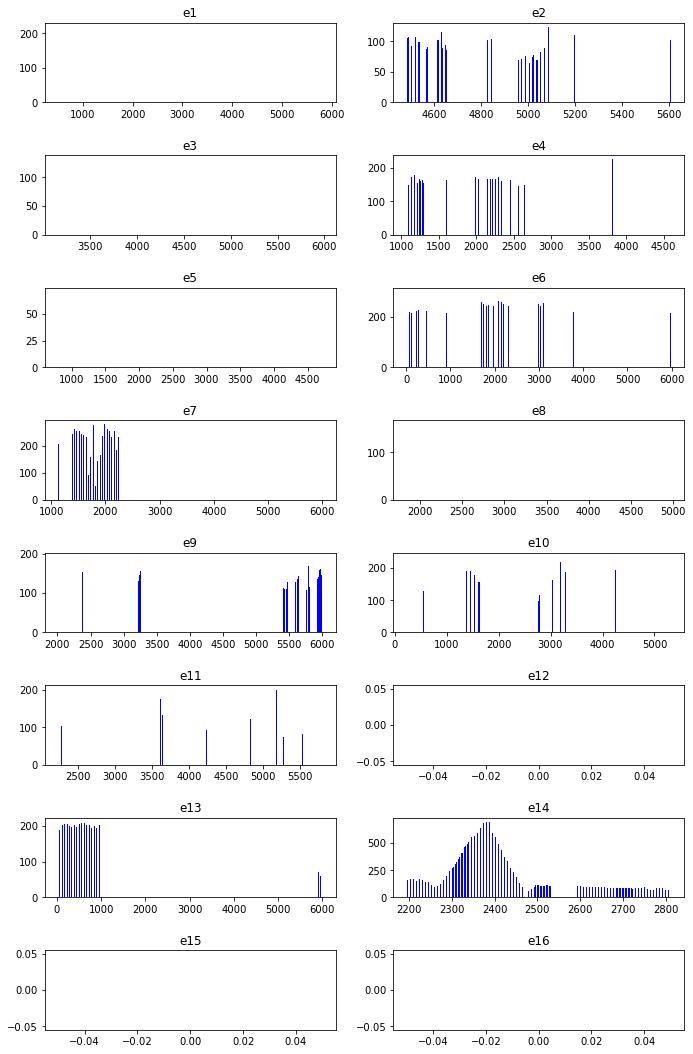

In [17]:
index = np.arange(len(df["e14"]))
bar_width =0.4
col = df.columns.tolist()
col=col[1:]
i=1
df=df.astype("float64")

plt.figure(figsize=(10,15))
for idx in col:
    plt.subplot(8,2,i)
    plt.bar(index,df[idx], color="b", align='edge', width = bar_width, label="subcam")
    plt.title(idx)
    i+=1

    
plt.tight_layout(pad =2, h_pad=2)
plt.show()
